# Analyse Cluster

The aim of this notebook is to analyse the clustering results in more detail and compare the clusters

### imports and preprocessing

In [54]:
import pickle
import json
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

In [55]:
specs = dict()

with open('obj/specjson210518.pkl', 'rb') as handle:
    specs = pickle.load(handle)

keys = list(specs.keys())
print(keys)
len(keys)

['1forge.com', '6-dot-authentiqio.appspot.com', 'adafruit.com', 'adobe.com:aem', 'adyen.com:CheckoutService', 'adyen.com:PaymentService', 'adyen.com:RecurringService', 'afterbanks.com', 'agco-ats.com', 'airport-web.appspot.com', 'amadeus.com', 'amazonaws.com:AWSMigrationHub', 'amazonaws.com:acm', 'amazonaws.com:acm-pca', 'amazonaws.com:alexaforbusiness', 'amazonaws.com:apigateway', 'amazonaws.com:application-autoscaling', 'amazonaws.com:appstream', 'amazonaws.com:appsync', 'amazonaws.com:athena', 'amazonaws.com:autoscaling', 'amazonaws.com:autoscaling-plans', 'amazonaws.com:batch', 'amazonaws.com:budgets', 'amazonaws.com:ce', 'amazonaws.com:cloud9', 'amazonaws.com:clouddirectory', 'amazonaws.com:cloudformation', 'amazonaws.com:cloudfront', 'amazonaws.com:cloudhsm', 'amazonaws.com:cloudhsmv2', 'amazonaws.com:cloudsearch', 'amazonaws.com:cloudsearchdomain', 'amazonaws.com:cloudtrail', 'amazonaws.com:codebuild', 'amazonaws.com:codecommit', 'amazonaws.com:codedeploy', 'amazonaws.com:codepi

1034

## length of the specs

In [56]:
specs_string = dict()

for spec in specs:
    str_spec = json.dumps(specs[spec])
    specs_string[spec] = str_spec
print(len(specs_string.keys()))

1034


In [57]:
with open('obj/specs_string.pkl', 'wb') as handle:
    pickle.dump(specs_string, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [58]:
spec_len = list()
for spec in specs_string:
    length = len(specs_string[spec])
    spec_len.append(length)
print(len(spec_len))

1034


In [59]:
#minimal length of spec
min(spec_len)

1362

In [60]:
#maximal length of spec
max(spec_len)

3259941

In [61]:
#mean length of spec
np.mean(spec_len)

77842.50580270794

In [62]:
#median length of spec
np.median(spec_len)

30538.5

In [63]:
#mode of list
max(set(spec_len), key=spec_len.count)

2883

In [64]:
with open('obj/spec_len.pkl', 'wb') as handle:
    pickle.dump(spec_len, handle, protocol=pickle.HIGHEST_PROTOCOL)

## prepare dataframes for extensiveness and structure

In [65]:
pathdf = pd.read_csv('PAMpath0518.csv',index_col='X')
pathdf = pathdf.iloc[:,1:]
pathdf['spec_len'] = spec_len
pathdf.head()

,paths,operations,pam_fit$clustering,spec_len
X,,,,
1forge.com,2,2,1,1362
6-dot-authentiqio.appspot.com,5,14,2,13452
adafruit.com,34,69,3,65937
adobe.com:aem,27,31,4,22375
adyen.com:CheckoutService,2,2,1,32474


In [66]:

col_list = ['swagger','info','host','basePath','schemes','consumes','produces','paths','definitions','parameters','responses','securityDefinitions','security','tags','externalDocs','title','description','termsOfService','contact','license','version']
col_list

['swagger',
 'info',
 'host',
 'basePath',
 'schemes',
 'consumes',
 'produces',
 'paths',
 'definitions',
 'parameters',
 'responses',
 'securityDefinitions',
 'security',
 'tags',
 'externalDocs',
 'title',
 'description',
 'termsOfService',
 'contact',
 'license',
 'version']

In [67]:
structdf = pd.read_csv('PAMcomplete0518.csv',index_col='X')
structdf = structdf.iloc[:,1:]
structdf['fields'] = structdf[col_list].sum(axis=1)
structdf['spec_len'] = spec_len
structdf.head()

,swagger,info,host,basePath,schemes,consumes,produces,paths,definitions,parameters,...,externalDocs,title,description,termsOfService,contact,license,version,pam_fit$clustering,fields,spec_len
X,,,,,,,,,,,,,,,,,,,,,
1forge.com,1,1,1,1,1,0,1,1,0,0,...,0,1,1,0,1,0,1,1,11,1362
6-dot-authentiqio.appspot.com,1,1,1,1,1,0,0,1,1,1,...,0,1,1,1,1,1,1,2,15,13452
adafruit.com,1,1,1,1,1,0,1,1,1,1,...,0,1,1,0,0,0,1,3,14,65937
adobe.com:aem,1,1,1,1,1,0,0,1,1,0,...,0,1,1,0,1,0,1,3,13,22375
adyen.com:CheckoutService,0,1,0,0,0,0,0,1,0,0,...,0,1,1,0,1,0,1,1,6,32474


## Paths Clustering Results

In [68]:
# cluster of path
pathdf['pam_fit$clustering'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18], dtype=int64)

Plot of Cluster:

![Plot of 18 Cluster](PlotPath0518.png)

Similarity: (first two most similar, last most dissimilar)

In [69]:
SimPathdf = pd.read_csv('Pathsimilar.csv',index_col='X')
SimPathdf = SimPathdf.iloc[:,1:]
SimPathdf.head()

,paths,operations
X,,
googleapis.com:games,52,105
amazonaws.com:autoscaling,52,104
kubernetes.io,488,1381
amazonaws.com:entitlement.marketplace,1,2


Distribution of clusters across the dataset:

In [70]:
#daat.YEARMONTH.value_counts()
pathdf['pam_fit$clustering'].value_counts()

8     102
1      91
4      87
9      86
13     82
12     72
2      70
3      64
15     62
5      62
14     57
6      48
17     43
11     39
10     36
7      18
16     14
18      1
Name: pam_fit$clustering, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024918382C50>,
      dtype=object)

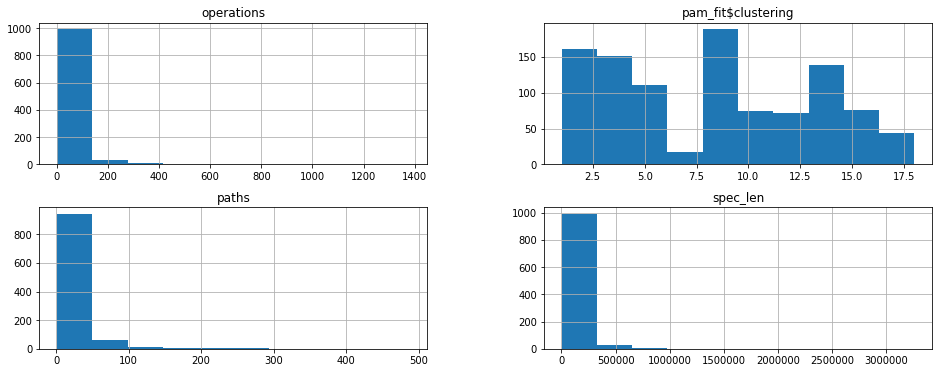

In [71]:
pathdf.hist()

In [72]:
#TODO: Add Charts of correlation


In [73]:
pathdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1034 entries, 1forge.com to zuora.com
Data columns (total 4 columns):
paths                 1034 non-null int64
operations            1034 non-null int64
pam_fit$clustering    1034 non-null int64
spec_len              1034 non-null int64
dtypes: int64(4)
memory usage: 40.4+ KB


In [74]:
pathdf.groupby('pam_fit$clustering').min()

,paths,operations,spec_len
pam_fit$clustering,,,
1,1,2,1362
2,5,13,8700
3,22,49,29567
4,9,24,10787
5,3,7,4410
6,1,3,3210
7,87,116,97302
8,1,1,1446
9,5,18,10124


In [75]:
pathdf.groupby('pam_fit$clustering').aggregate(['min', np.median, np.mean, max])

paths                         operations          \
                     min median        mean  max        min  median   
pam_fit$clustering                                                    
1                      1    2.0    1.714286    2          2     2.0   
2                      5   11.0   10.857143   17         13    15.0   
3                     22   34.0   35.375000   68         49    62.5   
4                      9   16.0   18.597701   32         24    29.0   
5                      3    5.5    5.725806    9          7     8.0   
6                      1    3.0    2.666667    3          3     3.0   
7                     87  116.0  116.833333  157        116   190.5   
8                      1    1.0    1.000000    1          1     1.0   
9                      5   12.0   12.720930   23         18    20.0   
10                    32   44.5   47.333333   67         70    95.5   
11                    52   75.0   76.128205  108         85   126.0   
12                    12   23.0   24.750000   44         33    40.0   
13                     3    7.0    7.158537   12         10    11.0   
14                     2    3.0    3.912281    6          6     6.0   
15                     1    2.0    2.870968    4          4     4.0   
16                   160  221.0  226.285714  277        206   330.0   
17                     2    3.0    3.348837    5          5     5.0   
18                   488  488.0  488.000000  488       1381  1381.0   

                                      spec_len                           \
                           mean   max      min     median          mean   
pam_fit$clustering                                                        
1                      2.000000     2     1362     7054.0  1.016251e+04   
2                     15.142857    17     8700    31438.5  4.286070e+04   
3                     62.921875    85    29567   111714.0  1.232480e+05   
4                     29.160920    35    10787    62838.0  7.084769e+04   
5                      7.983871     9     4410    22973.5  2.968797e+04   
6                      3.000000     3     3210    10685.0  2.987971e+04   
7                    202.333333   321    97302   454998.0  4.173021e+05   
8                      1.000000     1     1446     4049.5  1.394662e+04   
9                     20.267442    25    10124    42639.0  5.606556e+04   
10                    93.888889   132    34509   179097.0  1.903729e+05   
11                   128.871795   199    71599   235074.0  2.631408e+05   
12                    40.347222    51    15449    69738.5  8.463212e+04   
13                    11.000000    13     8079    29489.5  4.450795e+04   
14                     6.070175     7     4286    19657.0  2.177011e+04   
15                     4.000000     4     2194    12979.0  1.638661e+04   
16                   346.785714   548   123668   600593.5  8.721531e+05   
17                     5.000000     5     3753    17029.0  2.540093e+04   
18                  1381.000000  1381  3063649  3063649.0  3.063649e+06   

                             
                        max  
pam_fit$clustering           
1                     54642  
2                    164379  
3                    320353  
4                    297325  
5                     94658  
6                    330428  
7                    865317  
8                    667753  
9                    205995  
10                   592367  
11                   682246  
12                   282380  
13                   595062  
14                    70393  
15                   119612  
16                  3259941  
17                   138888  
18                  3063649

In [76]:
pathdf.groupby('pam_fit$clustering').describe()

operations                                            \
                        count         mean         std     min      25%   
pam_fit$clustering                                                        
1                        91.0     2.000000    0.000000     2.0     2.00   
2                        70.0    15.142857    1.332816    13.0    14.00   
3                        64.0    62.921875    7.820008    49.0    57.00   
4                        87.0    29.160920    2.880865    24.0    27.00   
5                        62.0     7.983871    0.819675     7.0     7.00   
6                        48.0     3.000000    0.000000     3.0     3.00   
7                        18.0   202.333333   57.619441   116.0   172.75   
8                       102.0     1.000000    0.000000     1.0     1.00   
9                        86.0    20.267442    1.830618    18.0    19.00   
10                       36.0    93.888889   13.698337    70.0    83.50   
11                       39.0   128.871795   25.975879    85.0   109.50   
12                       72.0    40.347222    4.693897    33.0    36.00   
13                       82.0    11.000000    0.955814    10.0    10.00   
14                       57.0     6.070175    0.257713     6.0     6.00   
15                       62.0     4.000000    0.000000     4.0     4.00   
16                       14.0   346.785714  102.901879   206.0   279.25   
17                       43.0     5.000000    0.000000     5.0     5.00   
18                        1.0  1381.000000         NaN  1381.0  1381.00   

                                             paths                ...      \
                       50%      75%     max  count        mean    ...       
pam_fit$clustering                                                ...       
1                      2.0     2.00     2.0   91.0    1.714286    ...       
2                     15.0    16.00    17.0   70.0   10.857143    ...       
3                     62.5    68.00    85.0   64.0   35.375000    ...       
4                     29.0    31.50    35.0   87.0   18.597701    ...       
5                      8.0     9.00     9.0   62.0    5.725806    ...       
6                      3.0     3.00     3.0   48.0    2.666667    ...       
7                    190.5   237.75   321.0   18.0  116.833333    ...       
8                      1.0     1.00     1.0  102.0    1.000000    ...       
9                     20.0    22.00    25.0   86.0   12.720930    ...       
10                    95.5   100.00   132.0   36.0   47.333333    ...       
11                   126.0   143.00   199.0   39.0   76.128205    ...       
12                    40.0    44.00    51.0   72.0   24.750000    ...       
13                    11.0    12.00    13.0   82.0    7.158537    ...       
14                     6.0     6.00     7.0   57.0    3.912281    ...       
15                     4.0     4.00     4.0   62.0    2.870968    ...       
16                   330.0   357.25   548.0   14.0  226.285714    ...       
17                     5.0     5.00     5.0   43.0    3.348837    ...       
18                  1381.0  1381.00  1381.0    1.0  488.000000    ...       

                                  spec_len                               \
                       75%    max    count          mean            std   
pam_fit$clustering                                                        
1                     2.00    2.0     91.0  1.016251e+04    9307.297084   
2                    14.00   17.0     70.0  4.286070e+04   33617.593538   
3                    39.25   68.0     64.0  1.232480e+05   60234.176062   
4                    24.00   32.0     87.0  7.084769e+04   47440.840790   
5                     7.00    9.0     62.0  2.968797e+04   22383.070150   
6                     3.00    3.0     48.0  2.987971e+04   61664.617263   
7                   123.75  157.0     18.0  4.173021e+05  189211.988794   
8                     1.00    1.0    102.0  1.394662e+04   66213.703207   


In [77]:
#Determine pivot table
impute_grps = pathdf.pivot_table(values=["operations","paths"], index=["pam_fit$clustering"], aggfunc=np.mean)
print(impute_grps) 

                     operations       paths
pam_fit$clustering                         
1                      2.000000    1.714286
2                     15.142857   10.857143
3                     62.921875   35.375000
4                     29.160920   18.597701
5                      7.983871    5.725806
6                      3.000000    2.666667
7                    202.333333  116.833333
8                      1.000000    1.000000
9                     20.267442   12.720930
10                    93.888889   47.333333
11                   128.871795   76.128205
12                    40.347222   24.750000
13                    11.000000    7.158537
14                     6.070175    3.912281
15                     4.000000    2.870968
16                   346.785714  226.285714
17                     5.000000    3.348837
18                  1381.000000  488.000000


In [78]:
impute_grps.sort_values('operations')

,operations,paths
pam_fit$clustering,,
8,1.000000,1.000000
1,2.000000,1.714286
6,3.000000,2.666667
15,4.000000,2.870968
17,5.000000,3.348837
14,6.070175,3.912281
5,7.983871,5.725806
13,11.000000,7.158537
2,15.142857,10.857143


In [79]:
mean_len = pathdf[["pam_fit$clustering","spec_len"]]
mean_len = mean_len.groupby('pam_fit$clustering').mean().astype(int)
mean_len

,spec_len
pam_fit$clustering,
1,10162
2,42860
3,123248
4,70847
5,29687
6,29879
7,417302
8,13946
9,56065


In [80]:
med_len = pathdf[["pam_fit$clustering","spec_len"]]
med_len = med_len.groupby('pam_fit$clustering').median()
med_len

,spec_len
pam_fit$clustering,
1,7054.0
2,31438.5
3,111714.0
4,62838.0
5,22973.5
6,10685.0
7,454998.0
8,4049.5
9,42639.0


In [81]:
impute_grps = impute_grps.sort_values('paths')
impute_grps['count'] = pathdf['pam_fit$clustering'].value_counts()
impute_grps['length'] = mean_len
impute_grps['length_med'] = med_len
impute_grps

,operations,paths,count,length,length_med
pam_fit$clustering,,,,,
8,1.000000,1.000000,102,13946,4049.5
1,2.000000,1.714286,91,10162,7054.0
6,3.000000,2.666667,48,29879,10685.0
15,4.000000,2.870968,62,16386,12979.0
17,5.000000,3.348837,43,25400,17029.0
14,6.070175,3.912281,57,21770,19657.0
5,7.983871,5.725806,62,29687,22973.5
13,11.000000,7.158537,82,44507,29489.5
2,15.142857,10.857143,70,42860,31438.5


In [82]:
impute_grps.corr()

,operations,paths,count,length,length_med
operations,1.000000,0.978232,-0.656551,0.999241,0.998341
paths,0.978232,1.000000,-0.732245,0.981793,0.965909
count,-0.656551,-0.732245,1.000000,-0.658220,-0.637253
length,0.999241,0.981793,-0.658220,1.000000,0.996128
length_med,0.998341,0.965909,-0.637253,0.996128,1.000000


In [83]:
impute_grps.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,operations,paths,count,length,length_med
operations,1.0,0.98,-0.66,1.0,1.0
paths,0.98,1.0,-0.73,0.98,0.97
count,-0.66,-0.73,1.0,-0.66,-0.64
length,1.0,0.98,-0.66,1.0,1.0
length_med,1.0,0.97,-0.64,1.0,1.0


In [84]:
impute_grps.corr(method='kendall').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,operations,paths,count,length,length_med
operations,1.0,1.0,-0.43,0.91,1.0
paths,1.0,1.0,-0.43,0.91,1.0
count,-0.43,-0.43,1.0,-0.45,-0.43
length,0.91,0.91,-0.45,1.0,0.91
length_med,1.0,1.0,-0.43,0.91,1.0


In [85]:
impute_grps.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,operations,paths,count,length,length_med
operations,1.0,1.0,-0.61,0.97,1.0
paths,1.0,1.0,-0.61,0.97,1.0
count,-0.61,-0.61,1.0,-0.61,-0.61
length,0.97,0.97,-0.61,1.0,0.97
length_med,1.0,1.0,-0.61,0.97,1.0


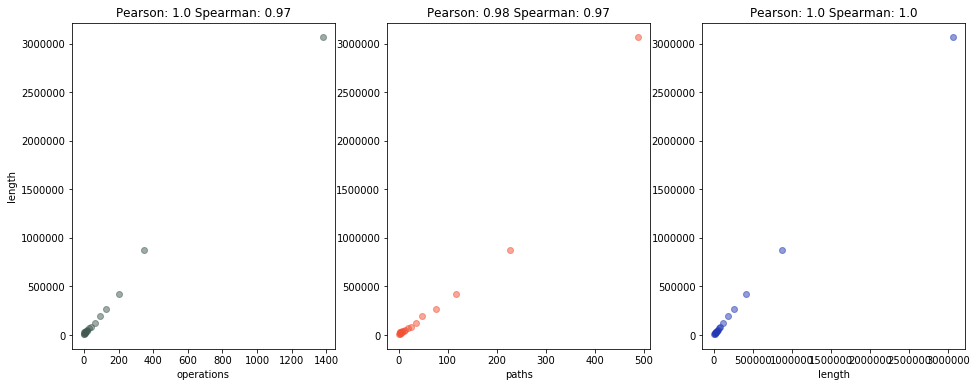

In [86]:
# plot correlated values
plt.rcParams['figure.figsize'] = [16, 6]

fig, ax = plt.subplots(nrows=1, ncols=3)

ax=ax.flatten()

cols = ['operations', 'paths', 'length']
colors=['#415952', '#f35134', '#243AB5', '#243AB5']
j=0

for i in ax:
    if j==0:
        i.set_ylabel('length')
    i.scatter(impute_grps[cols[j]], impute_grps['length'],  alpha=0.5, color=colors[j])
    i.set_xlabel(cols[j])
    i.set_title('Pearson: %s'%impute_grps.corr().loc[cols[j]]['length'].round(2)+' Spearman: %s'%impute_grps.corr(method='spearman').loc[cols[j]]['length'].round(2))
    j+=1

plt.show()

In [87]:
impute_grps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 8 to 18
Data columns (total 5 columns):
operations    18 non-null float64
paths         18 non-null float64
count         18 non-null int64
length        18 non-null int32
length_med    18 non-null float64
dtypes: float64(3), int32(1), int64(1)
memory usage: 1.4 KB


Now lets look into certain clusters:

In [88]:
cluster_n =  pathdf['pam_fit$clustering']==1
pathdf[cluster_n]

,paths,operations,pam_fit$clustering,spec_len
X,,,,
1forge.com,2,2,1,1362
adyen.com:CheckoutService,2,2,1,32474
adyen.com:RecurringService,2,2,1,13848
amazonaws.com:entitlement.marketplace,1,2,1,10333
amazonaws.com:kinesis-video-media,1,2,1,12883
amazonaws.com:mobileanalytics,1,2,1,7054
amazonaws.com:runtime.sagemaker,1,2,1,6093
amazonaws.com:translate,1,2,1,8511
apis.guru,2,2,1,5931


## Structure Clustering Results

In [89]:
# cluster of path
structdf['pam_fit$clustering'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

Plot of Clusters:

K = 8
![Plot of 8 Cluster](PlotStruct0518.png)

K = 4
![Plot of 4 Cluster](plotStruct40518.png)

K = 20
![Plot of 20 Cluster](plotStruct200518.png)

Similarity: (first two most similar, last most dissimilar)

In [90]:
SimStructdf = pd.read_csv('Structsimilar.csv',index_col='X')
SimStructdf = SimStructdf.iloc[:,1:]
SimStructdf.head()

,swagger,info,host,basePath,schemes,consumes,produces,paths,definitions,parameters,...,securityDefinitions,security,tags,externalDocs,title,description,termsOfService,contact,license,version
X,,,,,,,,,,,,,,,,,,,,,
landregistry.gov.uk:deed,1,1,1,1,1,0,1,1,1,0,...,0,0,0,0,1,1,0,1,0,1
1forge.com,1,1,1,1,1,0,1,1,0,0,...,0,0,0,0,1,1,0,1,0,1
brex.io,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
amazonaws.com:kinesisanalytics,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,0,1,1,1,1


Distribution of clusters across the dataset:

In [91]:
structdf['pam_fit$clustering'].value_counts()

7    222
5    175
3    149
8    125
4    109
1    101
6     98
2     55
Name: pam_fit$clustering, dtype: int64

In [107]:
cor_df.corr(method='kendall').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,pam_fit$clustering,fields,spec_len
pam_fit$clustering,1.0,0.13,0.076
fields,0.13,1.0,0.23
spec_len,0.076,0.23,1.0


In [108]:
cor_df.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,pam_fit$clustering,fields,spec_len
pam_fit$clustering,1.0,0.13,0.11
fields,0.13,1.0,0.31
spec_len,0.11,0.31,1.0


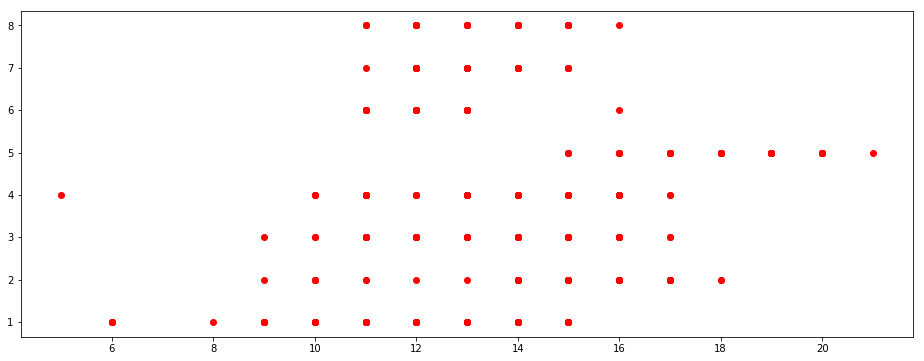

In [119]:

plt.plot(structdf['fields'],structdf['pam_fit$clustering'], 'ro')

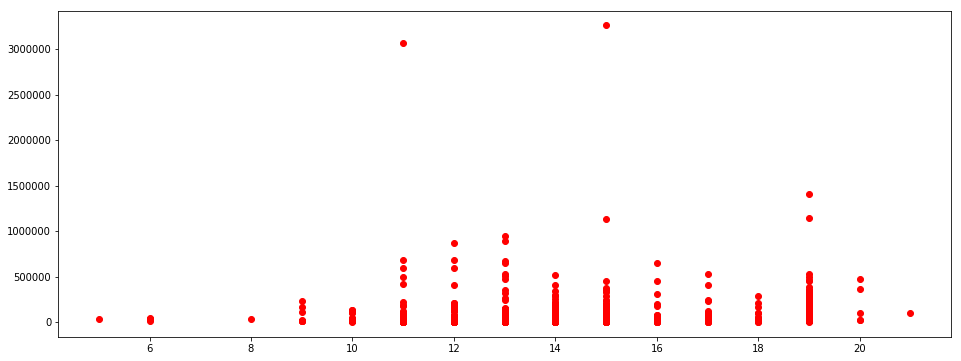

In [120]:
plt.plot(structdf['fields'],structdf['spec_len'], 'ro')

In [94]:
display(structdf.groupby('pam_fit$clustering').median())

,swagger,info,host,basePath,schemes,consumes,produces,paths,definitions,parameters,...,tags,externalDocs,title,description,termsOfService,contact,license,version,fields,spec_len
pam_fit$clustering,,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,12.0,24779.0
2,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,16.0,29518.0
3,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,14.0,20280.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,13.0,8700.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,19.0,85534.0
6,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,13.0,26579.0
7,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,14.0,24208.5
8,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,15.0,46612.0


In [95]:
structdf.groupby('pam_fit$clustering').min()

,swagger,info,host,basePath,schemes,consumes,produces,paths,definitions,parameters,...,tags,externalDocs,title,description,termsOfService,contact,license,version,fields,spec_len
pam_fit$clustering,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,6,1362
2,0,1,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,1,9,3636
3,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,9,1540
4,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,5,1435
5,1,1,1,0,1,1,1,1,0,0,...,0,0,1,0,0,0,0,1,15,2483
6,1,1,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,11,1529
7,1,1,1,0,1,0,0,1,1,0,...,0,0,1,1,0,0,0,1,11,3147
8,1,1,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,11,1526


In [96]:
stat_struct = structdf[["pam_fit$clustering","spec_len"]]
stat_struct = stat_struct.groupby('pam_fit$clustering').median()
stat_struct

,spec_len
pam_fit$clustering,
1,24779.0
2,29518.0
3,20280.0
4,8700.0
5,85534.0
6,26579.0
7,24208.5
8,46612.0


In [97]:
# medoidscomplete0518.csv
medoidpathdf = pd.read_csv('medoidscomplete0518.csv',index_col='X')
medoidpathdf = medoidpathdf.iloc[:,1:]
#pathdf['spec_len'] = spec_len
with pd.option_context('display.max_rows', None, 'display.max_columns', 30):
    print(medoidpathdf)


                                 swagger  info  host  basePath  schemes  \
X                                                                         
weatherbit.io                          1     1     1         1        1   
googleapis.com:adexchangebuyer2        1     1     1         1        1   
voodoomfg.com                          1     1     1         1        1   
neowsapp.com                           1     1     1         1        1   
amazonaws.com:xray                     1     1     1         1        1   
azure.com:automation-account           1     1     1         0        1   
windows.net:graphrbac                  1     1     1         0        1   
googleapis.com:youtubereporting        1     1     1         1        1   

                                 consumes  produces  paths  definitions  \
X                                                                         
weatherbit.io                           0         1      1            1   
googleapis.com:adexchang

In [98]:
medoids = list(medoidpathdf.index.values)
print(type(medoids))
medoids

<class 'list'>


['weatherbit.io',
 'googleapis.com:adexchangebuyer2',
 'voodoomfg.com',
 'neowsapp.com',
 'amazonaws.com:xray',
 'azure.com:automation-account',
 'windows.net:graphrbac',
 'googleapis.com:youtubereporting']

In [99]:
medoids_df = structdf.loc[medoids]
medoids_df = medoids_df[["pam_fit$clustering", "spec_len"]]
medoids_df

,pam_fit$clustering,spec_len
X,,
weatherbit.io,1,121837
googleapis.com:adexchangebuyer2,2,84758
voodoomfg.com,3,23647
neowsapp.com,4,9342
amazonaws.com:xray,5,38236
azure.com:automation-account,6,67102
windows.net:graphrbac,7,61023
googleapis.com:youtubereporting,8,25702


In [100]:
lengths_struct = []
for i in range(1,9):
    cluster_n =  structdf['pam_fit$clustering']== i
    clust_df = structdf[cluster_n]
    mean = clust_df["spec_len"].mean().astype(int)
    median = clust_df["spec_len"].median()
    print("Cluster {} has a spec length mean of {} and a median of {}".format(i, mean, median))
    lengths_struct.append([i, mean, median])

Cluster 1 has a spec length mean of 79640 and a median of 24779.0
Cluster 2 has a spec length mean of 69359 and a median of 29518.0
Cluster 3 has a spec length mean of 69641 and a median of 20280.0
Cluster 4 has a spec length mean of 65690 and a median of 8700.0
Cluster 5 has a spec length mean of 132920 and a median of 85534.0
Cluster 6 has a spec length mean of 62940 and a median of 26579.0
Cluster 7 has a spec length mean of 48941 and a median of 24208.5
Cluster 8 has a spec length mean of 86398 and a median of 46612.0


In [101]:
lengths_struct

[[1, 79640, 24779.0],
 [2, 69359, 29518.0],
 [3, 69641, 20280.0],
 [4, 65690, 8700.0],
 [5, 132920, 85534.0],
 [6, 62940, 26579.0],
 [7, 48941, 24208.5],
 [8, 86398, 46612.0]]

In [102]:
len_df = pd.DataFrame.from_records(lengths_struct)
len_df.columns = ['cluster','mean', 'median']
len_df.set_index('cluster', inplace=True)
len_df

,mean,median
cluster,,
1,79640,24779.0
2,69359,29518.0
3,69641,20280.0
4,65690,8700.0
5,132920,85534.0
6,62940,26579.0
7,48941,24208.5
8,86398,46612.0


Now lets look into certain clusters:

In [103]:
cluster_n =  structdf['pam_fit$clustering']==8
structdf[cluster_n]

,swagger,info,host,basePath,schemes,consumes,produces,paths,definitions,parameters,...,externalDocs,title,description,termsOfService,contact,license,version,pam_fit$clustering,fields,spec_len
X,,,,,,,,,,,,,,,,,,,,,
consumerfinance.gov,1,1,1,1,1,0,0,1,1,0,...,1,1,1,0,0,0,1,8,12,4286
data.gov,1,1,1,1,1,0,0,1,0,0,...,1,1,1,0,0,0,1,8,13,10269
exavault.com,1,1,1,1,1,0,0,1,1,0,...,1,1,1,0,0,0,1,8,12,52751
geodesystems.com,1,1,1,1,1,0,0,1,0,0,...,0,1,1,0,0,0,1,8,11,685831
googleapis.com:abusiveexperiencereport,1,1,1,1,1,0,0,1,1,1,...,1,1,1,0,1,0,1,8,15,6918
googleapis.com:acceleratedmobilepageurl,1,1,1,1,1,0,0,1,1,1,...,1,1,1,0,1,0,1,8,14,5926
googleapis.com:adexchangebuyer,1,1,1,1,1,0,0,1,1,1,...,1,1,1,0,1,0,1,8,15,102102
googleapis.com:adexperiencereport,1,1,1,1,1,0,0,1,1,1,...,1,1,1,0,1,0,1,8,15,7432
googleapis.com:adsense,1,1,1,1,1,0,0,1,1,1,...,1,1,1,0,1,0,1,8,15,69565
